In [137]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [138]:
# function to load the simulation data from the json file
def load_config(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [139]:
config = load_config('simulation_data.json')

# Convert the json file data into a pandas DataFrame
df = pd.DataFrame(config)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,790,791,792,793,794,795,796,797,798,799
0,0.292969,0.000000,2.087987,0.701330,1.243813,2.071460,0.988473,1.540309,1.780373,0.000000,...,0.901387,0.796050,0.724503,0.882804,1.255969,0.000000,0.911582,1.422033,0.804137,0.000000
1,1.254347,0.859949,1.261862,0.818830,1.370606,0.000000,1.431632,0.743391,0.517287,1.849459,...,1.331283,0.461120,0.375536,1.050369,2.141828,0.987802,1.048357,1.704458,1.632401,1.412645
2,1.246903,0.859306,0.785466,0.502515,0.000000,0.459923,1.462752,0.533678,0.899718,1.212545,...,0.000000,1.017974,0.027931,1.302820,1.202249,1.053980,0.225127,1.032699,1.626368,1.120788
3,0.221764,0.000000,0.751160,0.123973,1.342306,0.365010,2.184844,1.365634,1.320030,1.015865,...,0.880875,1.391326,1.024069,2.257083,1.565195,0.901011,0.369077,1.133662,1.021206,1.316713
4,0.669711,1.872075,0.836495,0.077981,0.000000,1.085526,0.000000,0.455557,1.159842,1.157423,...,1.982191,1.270131,1.371417,0.925181,1.370737,1.231987,1.745550,0.421920,0.679766,2.058315


In [140]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(df, value_name="Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
df.index = df.index + 1 # this switches the x-axis labels to strat from 1 instead of 0



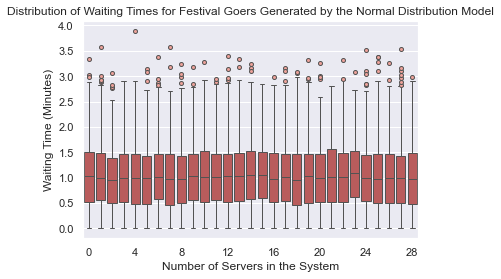

In [141]:
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


xticks_interval = 4
labels = ax.get_xticks()[::xticks_interval] 
ax.set_xticks(labels)

plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of Servers in the System")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

<Figure size 720x432 with 0 Axes>

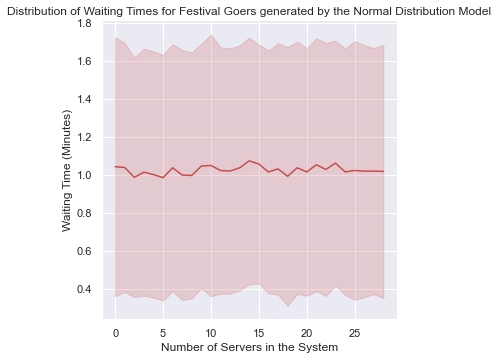

In [142]:
plt.figure(figsize=(10, 6))
sns.relplot(x=df_melted.index, y="Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c") #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of Servers in the System")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

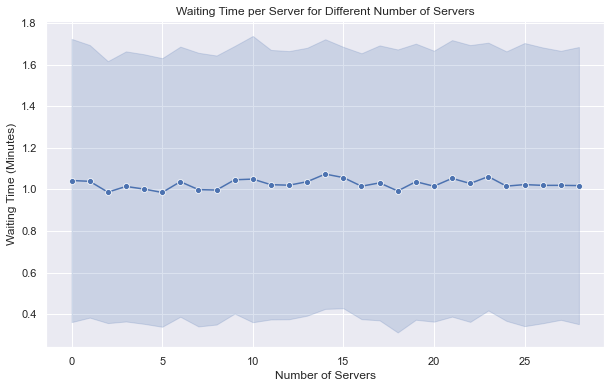

In [143]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Waiting Time', data=df_melted, marker='o', errorbar="sd")
plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

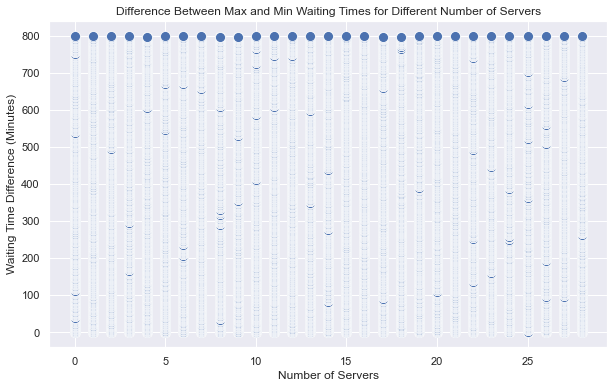

In [144]:
waiting_time_diff = df_melted.max(axis=1) - df_melted.min(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_melted.index, y=waiting_time_diff, s=100)
#sns.scatterplot(x=range(1, len(waiting_time_diff)+1), y=waiting_time_diff, color='skyblue', s=100)
plt.title("Difference Between Max and Min Waiting Times for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time Difference (Minutes)")
#plt.xticks(range(1, len(waiting_time_diff)+1))  # Set x-axis ticks to actual number of servers
plt.show()